C:\Users\singhy\AppData\Local\Temp\ipykernel_10792\2083485494.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ee_flows['date'] = pd.to_datetime(ee_flows['year'].astype(str) + 'Q' + ee_flows['quarter'].astype(str))
C:\Users\singhy\AppData\Local\Temp\ipykernel_10792\2083485494.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  long_employment['date'] = pd.to_datetime(long_employment['year'].astype(str) + 'Q' + long_employment['quarter'].astype(str))


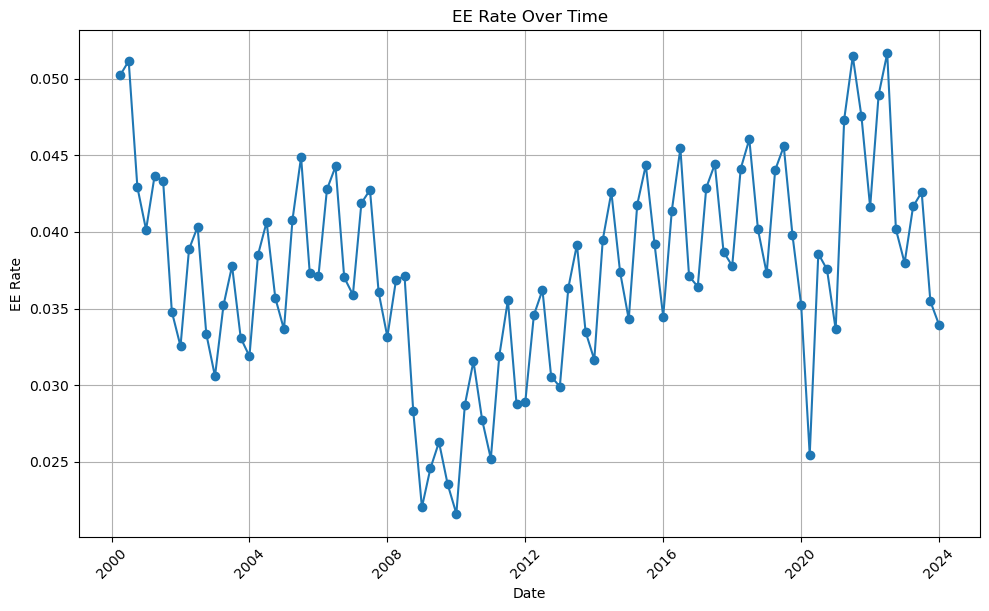

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

data_dir = "C:/Users/singhy/Desktop/Chicago/cps_data/inflation/raw_data/LEHD"

ee_flows = pd.read_csv(f"{data_dir}/EE_flows.csv")
long_employment = pd.read_csv(f"{data_dir}/long_employment.csv")

# Construct a quarterly date from year and quarter
ee_flows['date'] = pd.to_datetime(ee_flows['year'].astype(str) + 'Q' + ee_flows['quarter'].astype(str))
long_employment['date'] = pd.to_datetime(long_employment['year'].astype(str) + 'Q' + long_employment['quarter'].astype(str))

# Merge on date
merged = pd.merge(ee_flows, long_employment, on='date')

# Calculate EE rate
merged['ee_rate'] = merged['EE'] / merged['Emp']

# Select output columns
ee_rate_output = merged[['date', 'ee_rate']]

# Save to Excel
output_path = f"{data_dir}/ee_rate_output.xlsx"
ee_rate_output.to_excel(output_path, index=False)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(ee_rate_output['date'], ee_rate_output['ee_rate'], marker='o')
plt.title("EE Rate Over Time")
plt.xlabel("Date")
plt.ylabel("EE Rate")
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()
